In [52]:
from src.functions import *

In [53]:
plt.rcParams.update(
    {
        "xtick.direction": "in",
        "ytick.direction": "out",
        "ytick.right": False,
        "xtick.top": False,
        "ytick.left": True,
        "xtick.bottom": False,
        "figure.facecolor": "1",
        "savefig.facecolor": "1",
        "savefig.dpi": 600,
        "figure.dpi": 600,
        "savefig.bbox": "tight",
        "font.size": 7,
        "font.family": "serif",
        "lines.markersize": 6,
        "lines.linewidth": 1,
        'axes.axisbelow' : True
    }
)

In [55]:
phase_diagrams = {}
g = {}
g_avg = {}
g_std = {}

for n in [3,4,5,6,7,8]:
    phase_diagrams[n] = load_from_json(f'data/binder_cumulant_n{n}_T0_500.json')
    g[n] = phase_diagrams[n]['g']
    g_avg[n] = phase_diagrams[n]['g_avg']
    g_std[n] = phase_diagrams[n]['g_std']

gamma_range = phase_diagrams[4]['gamma_range']
T = phase_diagrams[4]['T']
num_random_models = phase_diagrams[4]['num_random_models']

In [87]:
gamma_c = 0.5428571428571429

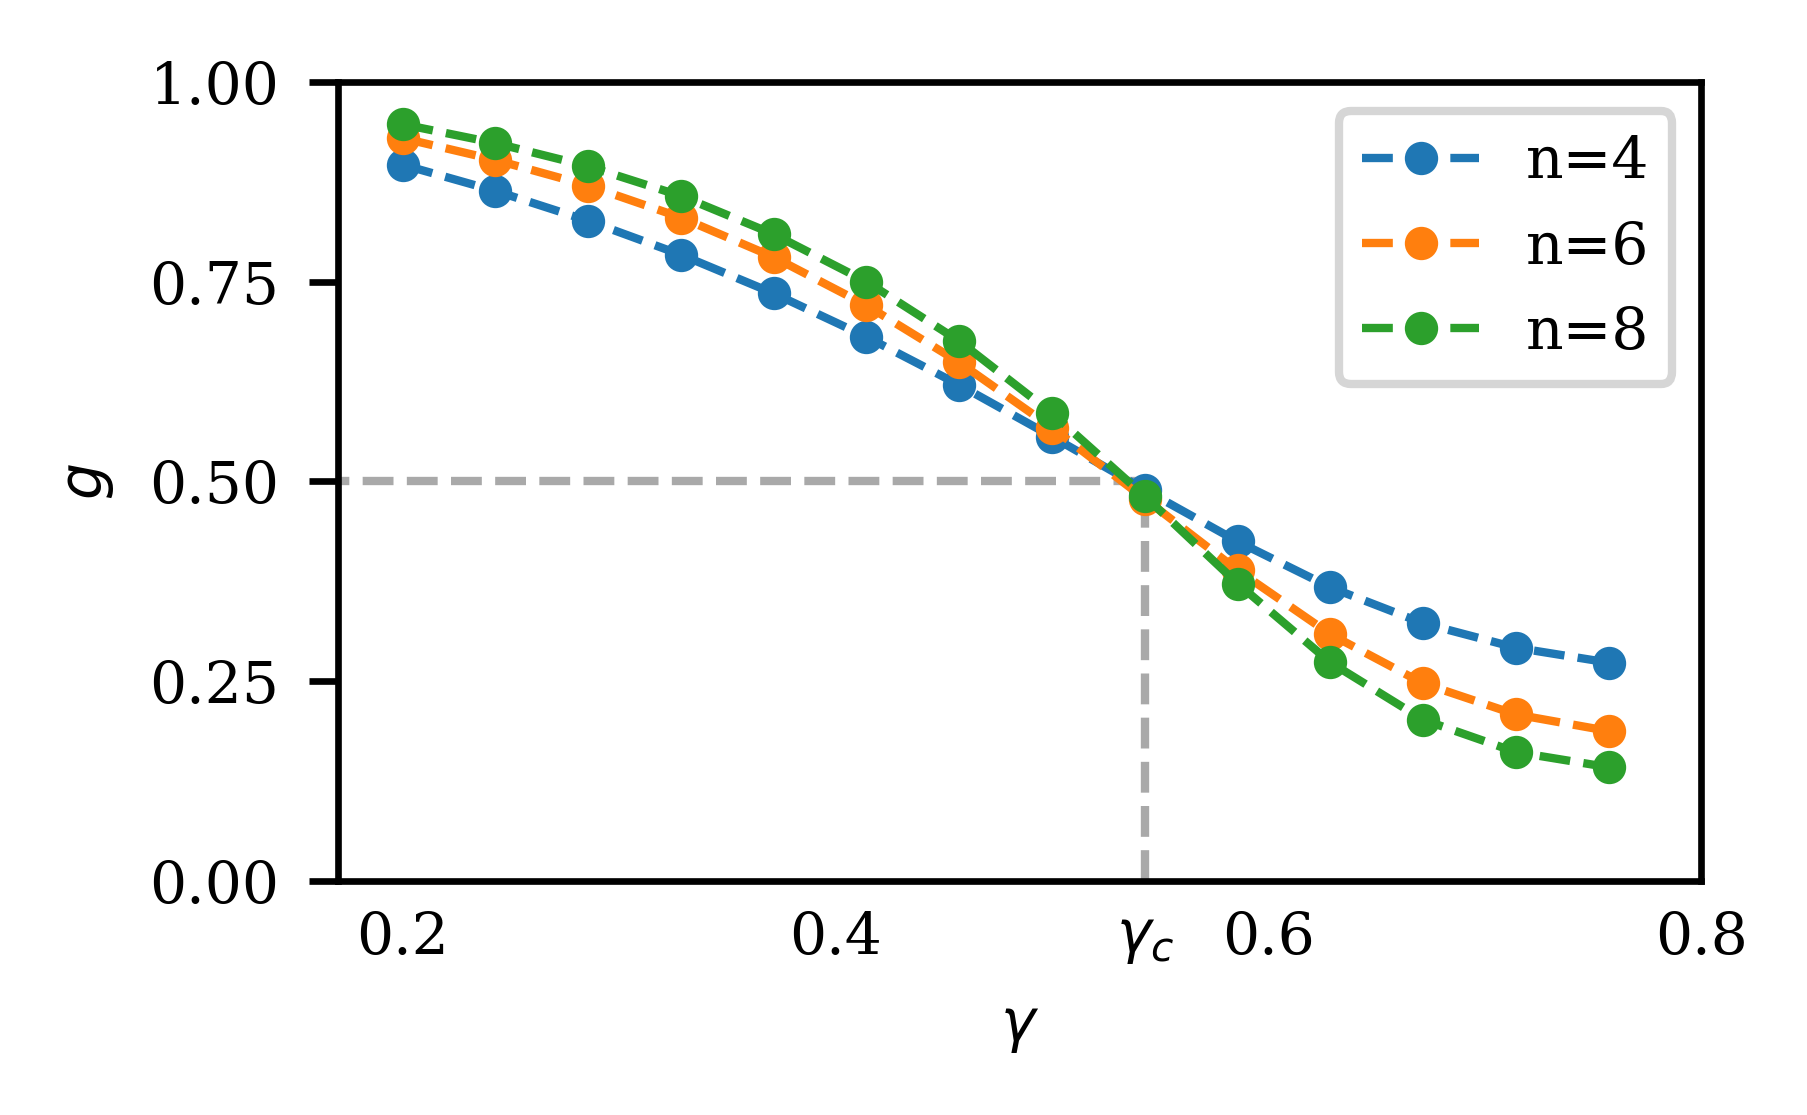

In [117]:
fig = plt.figure(figsize=(figure_size_x/2, figure_size_y/2))

left_lim = 0
right_lim = -1

plt.vlines(gamma_c, 
           ymin=0, 
           ymax=0.5,
           linestyles='--',
           colors=grey
           )
plt.hlines(0.5, 
           xmin=0.1, 
           xmax=gamma_c,
           linestyles='--',
           colors=grey
           )

colors = {4: dark_grey,
          6: dark_grey,
          8: dark_grey}

for n in [4,6,8]:
    plt.plot(gamma_range[left_lim:right_lim], 
            g_avg[n][left_lim:right_lim], 
            '.--', 
            label=f'n={n}',
            # color=colors[n],
            alpha=1
            )

plt.xlim(0.17, 0.78)
plt.ylim(0,1)
plt.yticks([0,0.25,0.5,0.75,1])
plt.xticks([0.2,0.4,gamma_c,0.6,0.8], labels=[0.2,0.4,'$\gamma_c$',0.6,0.8])

plt.xlabel('$\gamma$')
plt.ylabel('$g$')

plt.legend()

plt.tight_layout()
plt.show()
fig.savefig(local_path+f'figures/binder_cumulant')